In [5]:
import coulfg
import mpmath
import numpy as np

In [6]:
print(coulfg.coulfg.__doc__)

fc,gc,fcp,gcp = coulfg(xx,eta1,xlmin,xlmax,[mode1,kfn])

Wrapper for ``coulfg``.

Parameters
----------
xx : input float
eta1 : input float
xlmin : input float
xlmax : input float

Other Parameters
----------------
mode1 : input int, optional
    Default: 1
kfn : input int, optional
    Default: 0

Returns
-------
fc : rank-1 array('d') with bounds (xlmax - xlmin)
gc : rank-1 array('d') with bounds (xlmax - xlmin)
fcp : rank-1 array('d') with bounds (xlmax - xlmin)
gcp : rank-1 array('d') with bounds (xlmax - xlmin)



In [7]:
print(mpmath.coulombf.__doc__)


Calculates the regular Coulomb wave function

.. math ::

    F_l(\eta,z) = C_l(\eta) z^{l+1} e^{-iz} \,_1F_1(l+1-i\eta, 2l+2, 2iz)

where the normalization constant `C_l(\eta)` is as calculated by
:func:`~mpmath.coulombc`. This function solves the differential equation

.. math ::

    f''(z) + \left(1-\frac{2\eta}{z}-\frac{l(l+1)}{z^2}\right) f(z) = 0.

A second linearly independent solution is given by the irregular
Coulomb wave function `G_l(\eta,z)` (see :func:`~mpmath.coulombg`)
and thus the general solution is
`f(z) = C_1 F_l(\eta,z) + C_2 G_l(\eta,z)` for arbitrary
constants `C_1`, `C_2`.
Physically, the Coulomb wave functions give the radial solution
to the Schrodinger equation for a point particle in a `1/z` potential; `z` is
then the radius and `l`, `\eta` are quantum numbers.

The Coulomb wave functions with real parameters are defined
in Abramowitz & Stegun, section 14. However, all parameters are permitted
to be complex in this implementation (see references).

**Plots**

In [10]:
zs = np.linspace(0.10,20,10000)
eta = 1
l = 0

In [13]:
coulfg.coulfg(0.2,eta,l,l+1)

(array([0.02615587]),
 array([4.85826285]),
 array([0.15375548]),
 array([-9.67337118]))

In [20]:
%%timeit
np.array([ coulfg.coulfg(z,eta,l,l+1) for z in zs])[:,0,0]

29.1 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
print(resulk)

In [21]:
%%timeit
np.array([ mpmath.coulombf(l,eta,z) for z in zs])

2.15 s ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
from matplotlib import pyplot as plt

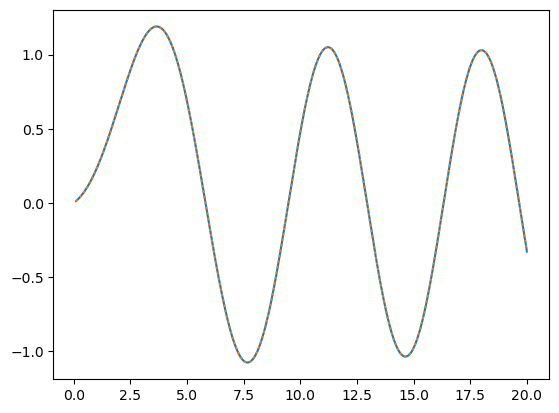

In [25]:
plt.plot(x, np.array([ coulfg.coulfg(z,eta,l,l+1) for z in zs])[:,0,0])
plt.plot(x, np.array([ mpmath.coulombf(l,eta,z) for z in zs]), ":")